In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iowa = pd.read_csv("C:\\Users\panag\Desktop\Python Projects\liquor_sales.csv")

In [3]:
iowa.shape

(74, 24)

In [4]:
iowa.dtypes

invoice_and_item_number     object
date                        object
store_number                 int64
store_name                  object
address                     object
city                        object
zip_code                   float64
store_location              object
county_number                int64
county                      object
category                     int64
category_name               object
vendor_number                int64
vendor_name                 object
item_number                  int64
item_description            object
pack                         int64
bottle_volume_ml             int64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold                 int64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

In [5]:
iowa.duplicated().sum()   

0

In [7]:
iowa.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [8]:
def eda(dataframe): 
    print("missing values \n", iowa.isnull().sum())
    print("dataframe index \n", iowa.index)
    print("dataframe types \n", iowa.dtypes)
    print("dataframe shape \n", iowa.shape)
    print("dataframe describe \n", iowa.describe())
    for item in iowa:
        print (item)
        print (iowa[item].nunique())

eda(iowa)



missing values 
 invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             9
county_number              0
county                     0
category                   0
category_name              6
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64
dataframe index 
 RangeIndex(start=0, stop=74, step=1)
dataframe types 
 invoice_and_item_number     object
date                        object
store_number                 int64
store_name                  object
address                     object
city                      

In [11]:
bottles_by_zip = iowa.groupby('zip_code')['bottles_sold'].sum()

In [12]:
iowa.groupby('zip_code')['bottles_sold'].sum()

zip_code
50010.0     288
50022.0       4
50111.0     108
50131.0      48
50158.0      33
50263.0      84
50265.0      72
50266.0      90
50314.0     348
50316.0      48
50317.0      24
50320.0     258
50327.0     102
50401.0      66
50461.0      30
50501.0     108
50588.0       4
50662.0       8
50701.0      13
50702.0     786
50703.0     229
50707.0      60
50801.0       5
51106.0     468
51246.0       5
51247.0       6
51360.0      48
51401.0      34
51501.0      61
51555.0       2
52001.0       4
52003.0       5
52136.0       2
52172.0       1
52240.0      78
52241.0      49
52314.0    1560
52338.0      90
52402.0     223
52411.0      36
52556.0       6
52601.0      72
52627.0      36
52732.0      24
52761.0       4
52803.0       3
52804.0       2
Name: bottles_sold, dtype: int64

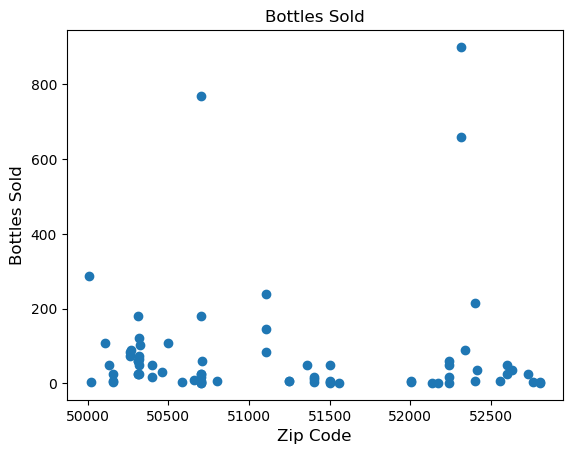

In [14]:
x = iowa.zip_code
y = iowa.bottles_sold
plt.scatter(x, y, marker="o")
plt.xlabel('Zip Code', fontsize='large')
plt.ylabel('Bottles Sold', fontsize='large')
plt.title('Bottles Sold', fontsize='large')
plt.show()

In [15]:
sum_sales = iowa['sale_dollars'].sum()

In [17]:
iowa['percentage_of_sales'] = (iowa['sale_dollars'] / sum_sales) * 100

In [18]:
iowa[['store_number', 'sale_dollars', 'percentage_of_sales']]

,store_number,sale_dollars,percentage_of_sales
0,3772,70.56,0.115170
1,4829,217.80,0.355498
2,3162,45.72,0.074625
3,2641,17.82,0.029086
4,2633,1755.60,2.865529
...,...,...,...
69,4136,1296.00,2.115360
70,4312,174.24,0.284398
71,2593,637.74,1.040933
72,2670,504.00,0.822640


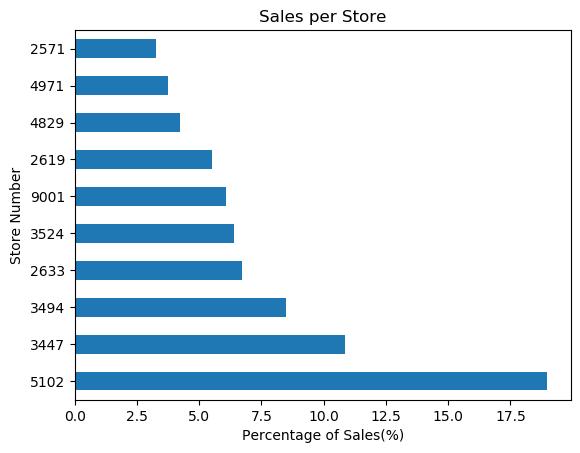

In [22]:
iowa.groupby('store_number')['percentage_of_sales'].sum().sort_values(ascending=False) \
    .head(10) \
    .plot(kind='barh')
plt.title('Sales per Store')
plt.xlabel('Percentage of Sales(%)')
plt.ylabel('Store Number')
plt.show()